<a href="https://colab.research.google.com/github/Jorge-Alvarez-23/Data-Science-III_Coder/blob/main/Proy_Final_AlvarezJorge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problematica

La detección de spam es una aplicación crucial del procesamiento del lenguaje natural (PLN), centrada en la identificación y el filtrado de mensajes no deseados, especialmente en las comunicaciones por correo electrónico.





# Data Set

## Fuente

El dataset utilizado para este proyecto fue descargado del siguiente sitio:

[Link:](https://www.kaggle.com/datasets/shantanudhakadd/email-spam-detection-dataset-classification)





## Caracteristicas Generales

El siguiente dataset contiene información relacionada con 5172 mensajes de correo electrónico seleccionados al azar y sus respectivas etiquetas para clasificación de spam o ham (spam o no spam)

# Data wrangling

## Importacion


In [1]:
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#Data wrangling----------------------------------------------
import chardet
import requests
import csv
import gdown
# Eliminacin signo puntuacion...............................................
import re
# Tokenizacion -----------------------------------------------
import nltk
nltk.download('punkt')  # Descargamos el paquete de tokenización de NLTK
nltk.download('punkt_tab')  # Descargamos el paquete de tokenización de NLTK
from nltk.tokenize import word_tokenize # Desde el módulo nltk.tokenize, quiero importar solo la función word_tokenize
# Stopwords----------------------------------------------------------------------
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#Lematizacion-------------------------------------------------------------------
nltk.download('wordnet')  # Base de datos léxica de WordNet para lematización en inglés
from nltk.stem import WordNetLemmatizer
from collections import Counter
#Wordcloud----------------------------------------------------------------------
from wordcloud import WordCloud
#N-gramas ----------------------------------------------------------------------
from sklearn.feature_extraction.text import CountVectorizer  # Para convertir texto en vectores de frecuencia (bolsa de palabras)
#Modelo de clasificacion -------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## Lectura

In [2]:
#  Funcion que devuelve  la codificacion de archivos de texto (como 'utf-8', 'latin-1').

def detectar_encoding_csv_url(url):

    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()  # Lanza una excepción para errores HTTP
        enc = chardet.detect(response.content[:1024])  # Lee los primeros 1024 bytes
        return enc['encoding']
    except requests.exceptions.RequestException as e:
        print(f"Error al descargar el archivo: {e}")
        return None
    except Exception as e:
        print(f"Error al detectar la codificación: {e}")
        return None



In [3]:
from IPython.display import Markdown, display

# Bloque de codigo encargado de cargar los datos a partir de una url de github y ponerlos en un dataframe

# URL del archivo de texto
url = 'https://github.com/Jorge-Alvarez-23/Data-Science-III_Coder/raw/main/spam.csv'

# Hacer la solicitud GET para obtener el contenido del archivo
response = requests.get(url)

# Verificar que la solicitud fue exitosa
if response.status_code == 200:

    # detecta el tipo de encoding que tiene el archivo
    encoding = detectar_encoding_csv_url(url)

    # Descargamos el archivo con gdown
    gdown.download(url, 'Spam.csv', quiet=False)

    # Leemos el archivo CSV descargado
    df = pd.read_csv('Spam.csv', encoding=encoding)

    # Establecer opción para mostrar todas las columnas
    pd.set_option('display.max_columns', None)  # Muestra todas las columnas
    pd.set_option('display.expand_frame_repr', False)  # Evita que se divida el DataFrame en múltiples líneas

    # Mostrar el DataFrame
    display(df.sample(10))

    display(Markdown(f"La codificación detectada es: **{encoding}**"))
else:
    print(f'Error al acceder al archivo: {response.status_code}')


Downloading...
From: https://github.com/Jorge-Alvarez-23/Data-Science-III_Coder/raw/main/spam.csv
To: /content/Spam.csv
100%|██████████| 504k/504k [00:00<00:00, 11.6MB/s]


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
923,ham,She went to attend another two rounds today..b...,NaN,NaN,NaN
3341,ham,You will go to walmart. I.ll stay.,NaN,NaN,NaN
4173,ham,And pls pls drink plenty plenty water,NaN,NaN,NaN
5212,ham,K.k.how is your business now?,NaN,NaN,NaN
3927,ham,Babe ? I lost you ... Will you try rebooting ?,NaN,NaN,NaN
4911,ham,I am on the way to tirupur.,NaN,NaN,NaN
4512,spam,Money i have won wining number 946 wot do i do...,NaN,NaN,NaN
5070,ham,As in different styles?,NaN,NaN,NaN
208,ham,You please give us connection today itself bef...,NaN,NaN,NaN
5102,spam,This msg is for your mobile content order It h...,NaN,NaN,NaN


La codificación detectada es: **ISO-8859-1**

## Renombre de Variables

In [4]:
# Se reduce el df utilizando solo las columnas que son relevantes al proyecto.
df = df[["v1", "v2"]]

# Se renombra las columnas del DataFrame para que sea mas comprensible
df = df.rename(columns={"v1": "Category", "v2": "Email Text"})

## Visualizacion inicial de Datos

In [5]:
# Visualizamos algunas de las reviews.

# La número 49
print(df.loc[50, 'Email Text'])
print("\n" + "-"*80 + "\n")  # línea separadora


# La número 300
print(df.loc[301, 'Email Text'])
print("\n" + "-"*80 + "\n")  # línea separadora


# La número 5000
print(df.loc[5001, 'Email Text'])
print("\n" + "-"*80 + "\n")  # línea separadora


What you thinked about me. First time you saw me in class.

--------------------------------------------------------------------------------

Shit that is really shocking and scary, cant imagine for a second. Def up for night out. Do u think there is somewhere i could crash for night, save on taxi?

--------------------------------------------------------------------------------

You still around? Looking to pick up later

--------------------------------------------------------------------------------



In [6]:
df.head(10)

,Category,Email Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [7]:
df.isnull().sum()

,0
Category,0
Email Text,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Category    5572 non-null   object
 1   Email Text  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


## Eliminacion de duplicados

In [9]:
# Muestra la cantidad de registros duplicados

duplicados = df.duplicated()

display(Markdown(f"Duplicados  encontrados: ***{duplicados.sum()}***"))

Duplicados  encontrados: ***403***

In [10]:
# Elimina los registro duplicados

df = df.drop_duplicates()
display(Markdown(f"Data despues de eliminar duplicados: ***{len(df)}*** filas"))

Data despues de eliminar duplicados: ***5169*** filas

## Análisis de datos faltantes por columnas

In [11]:
#Muestra la cantidad de NULL que presenta cada columna, ordenados en orden ascendente

df.isnull().sum().sort_values(ascending=True)

,0
Category,0
Email Text,0


# Análisis exploratorio de los datos

## Análisis Univariado

In [12]:
# Se realizado un análisis univariado al calcular y visualizar la longitud de los correos electrónicos.

df["length"] = df["Email Text"].apply(len)
df.sort_values(by='length', ascending=False).head(10)

,Category,Email Text,length
1084,ham,For me the love should start with attraction.i...,910
1862,ham,The last thing i ever wanted to do was hurt yo...,790
2433,ham,Indians r poor but India is not a poor country...,632
1578,ham,How to Make a girl Happy? It's not at all diff...,611
2157,ham,Sad story of a Man - Last week was my b'day. M...,588
2379,ham,"Good evening Sir, hope you are having a nice d...",482
3015,ham,"&lt;#&gt; is fast approaching. So, Wish u a v...",461
1512,ham,"Hey sweet, I was wondering when you had a mome...",458
2369,ham,A Boy loved a gal. He propsd bt she didnt mind...,450
2407,ham,Solve d Case : A Man Was Found Murdered On &l...,444


## Análisis Bivariado

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

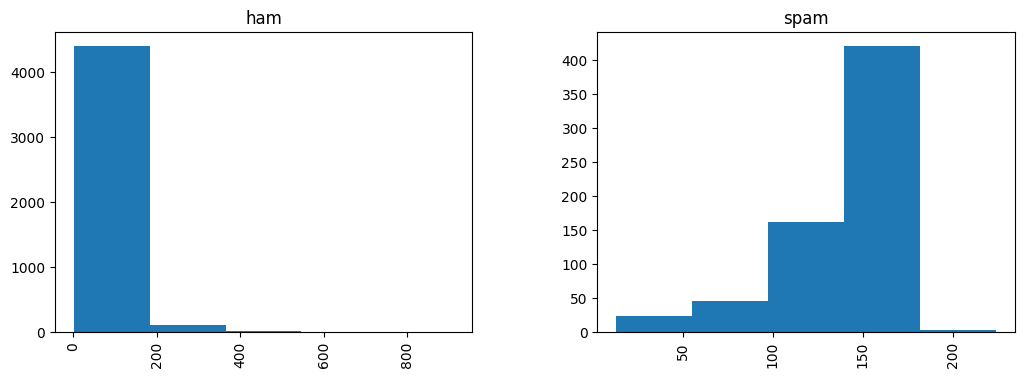

In [13]:
# Se analizó la relación entre la categoría del correo (spam o ham) y la longitud del correo

df.hist(column = 'length', by ='Category',figsize=(12,4), bins = 5)

## Conclusion
**Nótese que a través del histograma hemos podido descubrir que los mensajes de spam tienden a tener más caracteres**

# Normalizamos los valores pasando todo el texto a minúscula.

In [14]:
#  Se convierte todo el texto a minusculas y se crea una nueva columna

df['Email Text_lower'] = df['Email Text'].apply(lambda text: text.lower())


In [15]:
# previsualizamos el dataframe para obtener una comparativa.
df

,Category,Email Text,length,Email Text_lower
0,ham,"Go until jurong point, crazy.. Available only ...",111,"go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif u oni...,29,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"nah i don't think he goes to usf, he lives aro..."
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,this is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?,37,will ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s...",57,"pity, * was in mood for that. so...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...,125,the guy did some bitching but i acted like i'd...


# Quitamos signos de puntuación

In [16]:
# Se define una función que remueve los signos de puntuación usando re
def remove_punctuation(text):
    # Expresión regular para reemplazar cualquier signo de puntuación o símbolo no alfanumérico
     return re.sub(r'[^a-zA-Z0-9\s]', '', text)

# Aplicar la función a la columna 'Email Text_lower'
df['Email Text_puntuacion'] = df['Email Text_lower'].apply(remove_punctuation)

In [17]:
# Previsualizamos el dataframe con la nueva columna creada Email Text_puntuacion
df.head(50)

,Category,Email Text,length,Email Text_lower,Email Text_puntuacion
0,ham,"Go until jurong point, crazy.. Available only ...",111,"go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,29,ok lar... joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148,freemsg hey there darling it's been 3 week's n...,freemsg hey there darling its been 3 weeks now...
6,ham,Even my brother is not like to speak with me. ...,77,even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,as per your request 'melle melle (oru minnamin...,as per your request melle melle oru minnaminun...
8,spam,WINNER!! As a valued network customer you have...,158,winner!! as a valued network customer you have...,winner as a valued network customer you have b...
9,spam,Had your mobile 11 months or more? U R entitle...,154,had your mobile 11 months or more? u r entitle...,had your mobile 11 months or more u r entitled...


# Tokenización



In [18]:
# Tokenizamos los valores de la columna 'Email Text_puntuacion'
df['Email Text_tokenizado'] = df['Email Text_puntuacion'].apply(word_tokenize)


In [19]:
# Configuramos pandas para mostrar el contenido completo de las columnas
pd.set_option('display.max_colwidth', None)

In [20]:
# Mostramos las primeras filas con la columna original y de la columna tokenizada
df[['Email Text', 'Email Text_tokenizado']].head()

,Email Text,Email Text_tokenizado
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...","[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, cine, there, got, amore, wat]"
1,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]"
3,U dun say so early hor... U c already then say...,"[u, dun, say, so, early, hor, u, c, already, then, say]"
4,"Nah I don't think he goes to usf, he lives around here though","[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"


In [21]:
# Restauramos la configuración predeterminada de pandas para el ancho de las columnas
pd.reset_option('display.max_colwidth')

# Remover Stopwords


In [22]:
# Previsualizamos algunas stopwords previstas en la librería.



# Obtenemos el listado de stopwords en español
stopwords_eng = stopwords.words('english')

# Mostramos las primeras 20
print(stopwords_eng[:20])

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been']


Filtro Stopwords

In [23]:
# Importamos stopwords de NLTK (Pueden importarse tanto para español como para inglés)
nltk.download('stopwords') # Descargamos el paquete de stopwords de NLTK para poder usarlas en el código
from nltk.corpus import stopwords # Importamos el módulo de stopwords desde NLTK, que contiene listas de palabras vacías

# Lista de stopwords en inglés
stop_words = set(stopwords.words('english')) # Creamos un conjunto de stopwords en inglés usando NLTK

# Función para eliminar stopwords de los tokens
# Aplicamos una función lambda a cada fila de la columna 'review_tokenizado'
df['Email Text_tokenizado_sin_stopwords'] = df['Email Text_tokenizado'].apply(lambda tokens: [word for word in tokens if word not in stop_words])
    # La función lambda toma cada lista de tokens (palabras tokenizadas de la reseña),
    # y devuelve una nueva lista donde solo quedan las palabras que no están en la lista de stopwords.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
df

,Category,Email Text,length,Email Text_lower,Email Text_puntuacion,Email Text_tokenizado,Email Text_tokenizado_sin_stopwords
0,ham,"Go until jurong point, crazy.. Available only ...",111,"go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,ok lar... joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, 2, contact, u, u, 750, poun..."
5568,ham,Will Ì_ b going to esplanade fr home?,37,will ì_ b going to esplanade fr home?,will b going to esplanade fr home,"[will, b, going, to, esplanade, fr, home]","[b, going, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...",57,"pity, * was in mood for that. so...any other s...",pity was in mood for that soany other suggest...,"[pity, was, in, mood, for, that, soany, other,...","[pity, mood, soany, suggestions]"
5570,ham,The guy did some bitching but I acted like i'd...,125,the guy did some bitching but i acted like i'd...,the guy did some bitching but i acted like id ...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, id, interested, b..."


# Lematización


In [25]:
# Inicializar el lematizador
lemmatizer = WordNetLemmatizer()

# Aplicar la lematización a la columna 'review_tokenizado_sin_stopwords'
df['Email Text_lematizacion'] = df['Email Text_tokenizado_sin_stopwords'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

**Aunque el stemming es más rápido, la diferencia de rendimiento no es significativa en un conjunto de datos con apenas 5169 registros. La ganancia en precisión que se obtiene con la lematización es mucho más valiosa para el objetivo de construir un modelo de clasificación efectivo.**

## Previsualizamos el resultado final

In [26]:
# Previsualizamos las 5 versiones de la columna review.
df.head(15)

,Category,Email Text,length,Email Text_lower,Email Text_puntuacion,Email Text_tokenizado,Email Text_tokenizado_sin_stopwords,Email Text_lematizacion
0,ham,"Go until jurong point, crazy.. Available only ...",111,"go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,ok lar... joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, go, usf, life, around, though]"
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148,freemsg hey there darling it's been 3 week's n...,freemsg hey there darling its been 3 weeks now...,"[freemsg, hey, there, darling, its, been, 3, w...","[freemsg, hey, darling, 3, weeks, word, back, ...","[freemsg, hey, darling, 3, week, word, back, i..."
6,ham,Even my brother is not like to speak with me. ...,77,even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,as per your request 'melle melle (oru minnamin...,as per your request melle melle oru minnaminun...,"[as, per, your, request, melle, melle, oru, mi...","[per, request, melle, melle, oru, minnaminungi...","[per, request, melle, melle, oru, minnaminungi..."
8,spam,WINNER!! As a valued network customer you have...,158,winner!! as a valued network customer you have...,winner as a valued network customer you have b...,"[winner, as, a, valued, network, customer, you...","[winner, valued, network, customer, selected, ...","[winner, valued, network, customer, selected, ..."
9,spam,Had your mobile 11 months or more? U R entitle...,154,had your mobile 11 months or more? u r entitle...,had your mobile 11 months or more u r entitled...,"[had, your, mobile, 11, months, or, more, u, r...","[mobile, 11, months, u, r, entitled, update, l...","[mobile, 11, month, u, r, entitled, update, la..."


## Listado y visualizacion de las palabras con mayor frecuencia.

In [27]:
# Unimos todos los tokens lematizados en una sola lista
tokens_lematizacion = [token for tokens_list in df['Email Text_lematizacion'] for token in tokens_list]

# Contamos la frecuencia de cada palabra
frecuencia_palabras_lematizacion = Counter(tokens_lematizacion)

# Mostramos las 20 palabras más comunes
frecuencia_palabras_lematizacion.most_common(20)

[('u', 1059),
 ('call', 507),
 ('im', 456),
 ('2', 443),
 ('get', 375),
 ('ur', 316),
 ('go', 295),
 ('dont', 269),
 ('4', 257),
 ('ltgt', 254),
 ('ok', 251),
 ('know', 248),
 ('got', 243),
 ('free', 243),
 ('like', 234),
 ('come', 228),
 ('time', 223),
 ('good', 218),
 ('day', 215),
 ('ill', 210)]

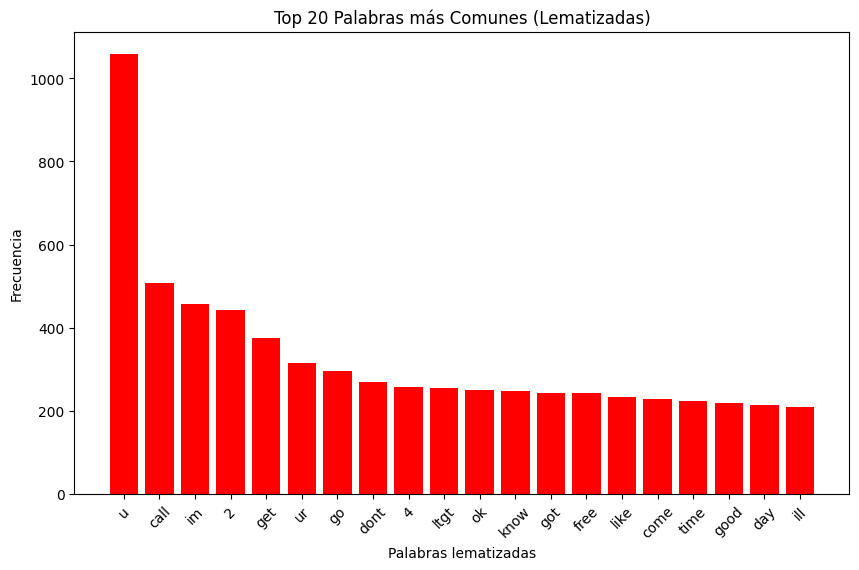

In [28]:

# Obtenemos las 20 palabras más comunes y sus frecuencias
palabras_stem, frecuencias_lema = zip(*frecuencia_palabras_lematizacion.most_common(20))

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))  # Ajustamos el tamaño del gráfico
plt.bar(palabras_stem, frecuencias_lema, color='red')

# Añadimos etiquetas y título
plt.xlabel('Palabras lematizadas')
plt.ylabel('Frecuencia')
plt.title('Top 20 Palabras más Comunes (Lematizadas)')

# Rotamos las etiquetas del eje X para que se lean mejor
plt.xticks(rotation=45)

# Mostramos el gráfico
plt.show()

# Nubes de palabras (Wordcloud)

## Wordcloud sin quitar Stopwords.

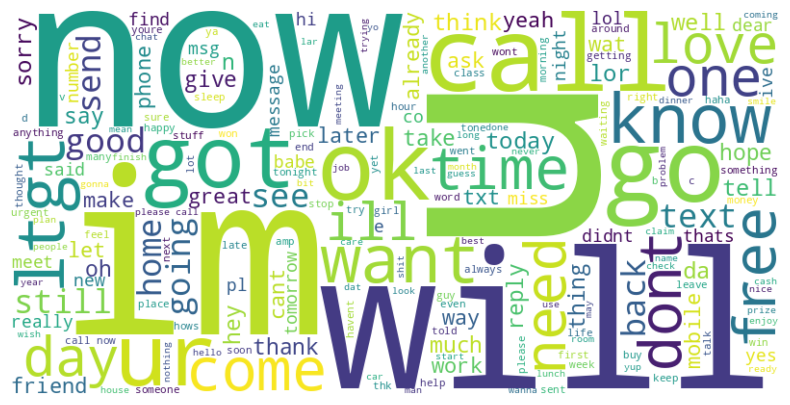

In [29]:
# Unir todo el texto de la columna 'Email Text_puntuacion'

#Esto es necesario porque la WordCloud genera la nube de palabras a partir de
# una única cadena de texto, y no puede procesar una columna de DataFrame directamente.

text = ' '.join(df['Email Text_puntuacion'])

# Generar la WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
# Crea un objeto WordCloud con un ancho de 800 píxeles, altura de 400, y fondo blanco.
# El método 'generate' crea la nube de palabras a partir del texto dado.

# Mostrar la WordCloud
plt.figure(figsize=(10, 5))
# Crea una figura de tamaño 10x5 pulgadas para la visualización de la nube.

plt.imshow(wordcloud, interpolation='bilinear')
# Muestra la nube de palabras en la figura, usando interpolación bilineal para suavizarla.

plt.axis('off')
# Oculta los ejes de la figura para una mejor visualización.

plt.show()
# Muestra la figura en pantalla.

## Wordcloud removiendo stopwords

In [30]:
# Importamos las stopwords de la biblioteca nltk
from nltk.corpus import stopwords

# Importamos nltk para gestionar recursos lingüísticos
import nltk

# Descargamos el paquete de stopwords de nltk
nltk.download('stopwords')

# Creamos un conjunto de stopwords en español
stop_words = list(stopwords.words('english'))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


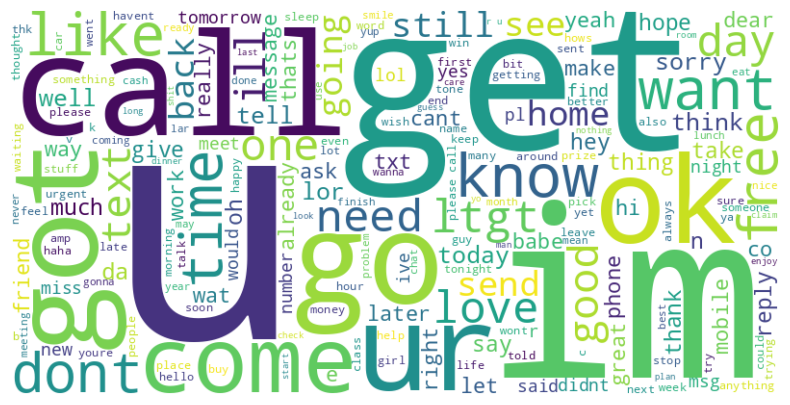

In [31]:
# Creamos la wordcloud removiendo stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords=stop_words).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Wordcloud removiendo stopwords de mensajes que no son spam

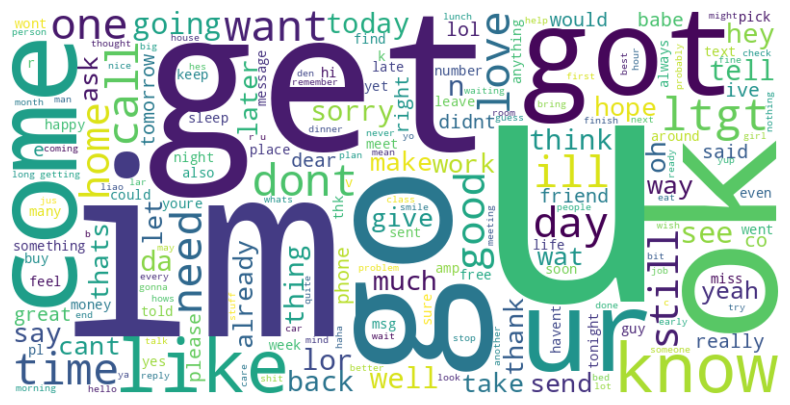

In [32]:
# Filtrar el DataFrame para solo incluir filas con sentimiento positivo
df_nospam = df[df['Category'] == 'ham']

# Unir el texto de la columna 'review_es_clean' de los valores positivos
text_nospam = ' '.join(df_nospam['Email Text_puntuacion'])

# Crear la wordcloud para los comentarios positivos
wordcloud_nospam = WordCloud(width=800, height=400, background_color='white',
                                stopwords=stop_words).generate(text_nospam)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_nospam, interpolation='bilinear')
plt.axis('off')
plt.show()

## Wordcloud removiendo stopwords de spam

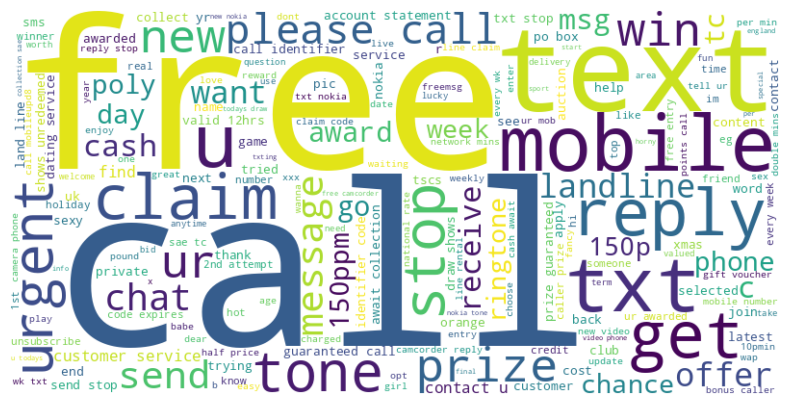

In [33]:
# Filtrar el DataFrame para solo incluir filas con sentimiento positivo
df_spam = df[df['Category'] == 'spam']

# Unir el texto de la columna 'review_es_clean' de los valores positivos
text_spam = ' '.join(df_spam['Email Text_puntuacion'])

# Crear la wordcloud para los comentarios positivos
wordcloud_spam = WordCloud(width=800, height=400, background_color='white',
                                stopwords=stop_words).generate(text_spam)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis('off')
plt.show()

# Wordcloud con N-gramas

## Generación y Visualización de la Wordcloud (Unigramas)

In [34]:
nltk.download('stopwords')  # Descarga las stopwords desde NLTK
stop_words = list(set(stopwords.words('english')))  # Obtiene y convierte a lista las stopwords en español

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


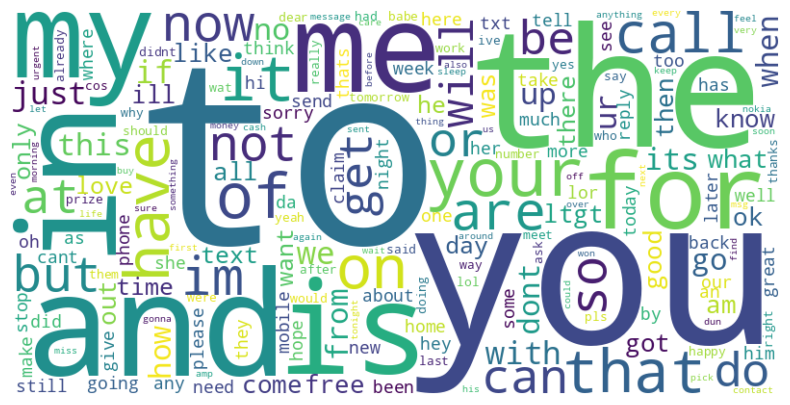

In [35]:
#Se convertira el texto en una matriz, formada por palabras individuales, apartir del
#de la cual se creara una nube de palabras del diccionario de frecuencias, mostrando en la
#nube las palabras que aparecen con mas frecuencias.

vectorizer = CountVectorizer(ngram_range=(1,1))

# Transformar el texto de la columna 'descripción' en n-gramas
X = vectorizer.fit_transform(df['Email Text_puntuacion'])

# Extraer los n-gramas y sus frecuencias
n_grams = vectorizer.get_feature_names_out()
frequencies = X.toarray().sum(axis=0)

# Crear un diccionario con los n-gramas y sus frecuencias
n_grams_freq = dict(zip(n_grams, frequencies))

# Generar la WordCloud desde las frecuencias de los n-gramas
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(n_grams_freq)

# Mostrar la WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Generación y Visualización de la Wordcloud (Trigramas)

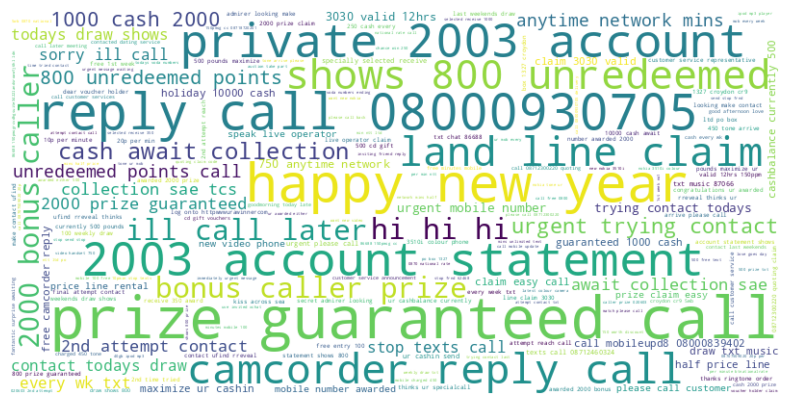

In [36]:
#Se convertira el texto en una matriz, formada porla combinacion de tres palabras incluyendo las stopwords,
#apartir del de la cual se creara una nube de palabras del diccionario de frecuencias, mostrando en la
#nube las palabras que aparecen con mas frecuencias.

# Crear el CountVectorizer con las stop_words definidas
vectorizer = CountVectorizer(ngram_range=(3,3), stop_words = stop_words)

# Transformar el texto de la columna 'descripción' en n-gramas
X = vectorizer.fit_transform(df['Email Text_puntuacion'])

# Extraer los n-gramas y sus frecuencias
n_grams = vectorizer.get_feature_names_out()
frequencies = X.toarray().sum(axis=0)

# Crear un diccionario con los n-gramas y sus frecuencias
n_grams_freq = dict(zip(n_grams, frequencies))

# Generar la WordCloud desde las frecuencias de los n-gramas
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(n_grams_freq)

# Mostrar la WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [37]:
# Convertimos el diccionario en df
df_n_grams_freq = pd.DataFrame(list(n_grams_freq.items()), columns=['Término', 'Frecuencia'])


In [38]:
# Ordenamos el df
dfgrams = df_n_grams_freq.sort_values(by='Frecuencia', ascending=False)

In [39]:
# Visualizamos los primeros 20 Trigramas con mayor frecuencia.
dfgrams.head(20)

,Término,Frecuencia
21511,prize guaranteed call,19
11960,happy new year,16
22358,reply call 08000930705,14
21482,private 2003 account,13
515,2003 account statement,13
14951,land line claim,12
4313,camcorder reply call,12
24022,shows 800 unredeemed,12
3417,bonus caller prize,11
13299,ill call later,11


In [40]:
# Importamos la librería
from sklearn.feature_extraction.text import CountVectorizer

# Unimos los tokens de cada email en una sola cadena de texto.
# Usamos la columna 'Email Text_tokenizado_sin_stopwords' que ya está limpia.
df['Email Text_clean'] = df['Email Text_tokenizado_sin_stopwords'].apply(lambda x: ' '.join(x))

# Creamos el objeto CountVectorizer para el modelo Bag of Words.
# No es necesario especificar 'stop_words' porque ya las eliminamos.
count_vectorizer = CountVectorizer()

# Ajustamos y transformamos los datos. Esto crea la matriz de Bag of Words.
X_bow = count_vectorizer.fit_transform(df['Email Text_clean'])

# Creamos un DataFrame para visualizar mejor el resultado.
# Esto puede ser una matriz muy grande, por lo que mostramos solo un fragmento.
df_bow = pd.DataFrame(X_bow.toarray(), columns=count_vectorizer.get_feature_names_out())

# Mostramos el shape del DataFrame y las primeras 5 filas
print("Shape de la matriz Bag of Words:", X_bow.shape)
print("\nMatriz Bag of Words (primeras 5 filas):")
print(df_bow.head())

Shape de la matriz Bag of Words: (5169, 9314)

Matriz Bag of Words (primeras 5 filas):
   008704050406  0089my  0121  01223585236  01223585334  0125698789  02  020603  0207  02070836089  02072069400  02073162414  02085076972  020903  021  050703  0578  06  060505  061104  07008009200  07046744435  07090201529  07090298926  07099833605  071104  07123456789  0721072  07732584351  07734396839  07742676969  07753741225  0776xxxxxxx  07786200117  077xxx  078  07801543489  07808  07808247860  07808726822  07815296484  07821230901  0784987  0789xxxxxxx  0794674629107880867867  0796xxxxxx  07973788240  07xxxxxxxxx  0800  08000407165  08000776320  08000839402  08000930705  08000938767  08001950382  08002888812  08002986030  08002986906  08002988890  08006344447  0808  08081263000  08081560665  0825  0844  08448350055  08448714184  0845  08450542832  08452810071  08452810073  08452810075over18s  0870  08700621170150p  08701213186  08701237397  08701417012  08701417012150p  0870141701216  0870162

# TF-IDF

In [41]:
# Importamos la librería
from sklearn.feature_extraction.text import TfidfVectorizer

# Creamos el objeto TfidfVectorizer.
# Scikit-learn gestiona la tokenización, conteo y cálculo de TF-IDF.
tfidf_vectorizer = TfidfVectorizer()

# Ajustamos y transformamos los datos. Esto crea la matriz TF-IDF.
X_tfidf = tfidf_vectorizer.fit_transform(df['Email Text_clean'])

# Creamos un DataFrame para visualizar el resultado.
# Convertimos la matriz dispersa a un array denso y le asignamos las columnas.
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Mostramos el shape del DataFrame y las primeras 5 filas
print("Shape de la matriz TF-IDF:", X_tfidf.shape)
print("\nMatriz TF-IDF (primeras 5 filas):")
print(df_tfidf.head())

Shape de la matriz TF-IDF: (5169, 9314)

Matriz TF-IDF (primeras 5 filas):
   008704050406  0089my  0121  01223585236  01223585334  0125698789   02  020603  0207  02070836089  02072069400  02073162414  02085076972  020903  021  050703  0578   06  060505  061104  07008009200  07046744435  07090201529  07090298926  07099833605  071104  07123456789  0721072  07732584351  07734396839  07742676969  07753741225  0776xxxxxxx  07786200117  077xxx  078  07801543489  07808  07808247860  07808726822  07815296484  07821230901  0784987  0789xxxxxxx  0794674629107880867867  0796xxxxxx  07973788240  07xxxxxxxxx  0800  08000407165  08000776320  08000839402  08000930705  08000938767  08001950382  08002888812  08002986030  08002986906  08002988890  08006344447  0808  08081263000  08081560665  0825  0844  08448350055  08448714184  0845  08450542832  08452810071  08452810073  08452810075over18s  0870  08700621170150p  08701213186  08701237397  08701417012  08701417012150p  0870141701216  087016248  087017

***Se eligio TF-IDF ya que ofrece una ventaja significativa no solo cuenta la frecuencia de una palabra como lo hace BoW, sino que también evalúa la importancia de esa palabra en todo el conjunto.***

# Modelo de clasificación - Support Vector Classifier (SVC)

In [42]:
#SVC funciona bien incluso cuando el número de características es mayor que el
#número de puntos de datos. Esto lo hace ideal para problemas de clasificación de texto, donde el vocabulario puede ser muy grande

# Usamos la matriz TF-IDF como nuestras características (X)
X = X_tfidf

# Usamos la columna 'Category' como nuestras etiquetas (y)
y = df['Category']

# Dividimos los datos en conjuntos de entrenamiento y prueba
# 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape del conjunto de entrenamiento (X): {X_train.shape}")
print(f"Shape del conjunto de prueba (X): {X_test.shape}")

Shape del conjunto de entrenamiento (X): (4135, 9314)
Shape del conjunto de prueba (X): (1034, 9314)


In [43]:
# Inicializamos el clasificador SVC
svc = SVC(kernel='linear', C=1.0, random_state=42)
# 'kernel' es la función que transforma los datos; 'linear' es una buena opción para texto.
# 'C' es un parámetro de regularización; un valor de 1.0 es un buen punto de partida.

# Entrenamos el modelo con los datos de entrenamiento
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

Reporte de Clasificación:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       889
        spam       0.98      0.85      0.91       145

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034

Matriz de Confusión:


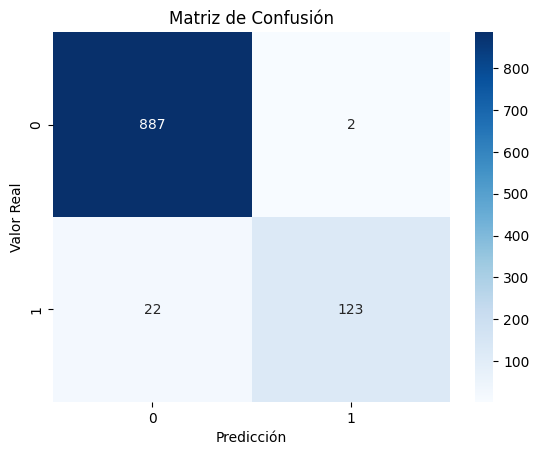

Precisión (Accuracy):
0.97678916827853


In [44]:
# Realizamos predicciones sobre el conjunto de prueba
y_pred = svc.predict(X_test)

# Evaluamos el rendimiento del modelo
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de Confusión:")
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

print("Precisión (Accuracy):")
print(accuracy_score(y_test, y_pred))

# Visualizamos palabras asociadas a reseñas positivas y negativas.


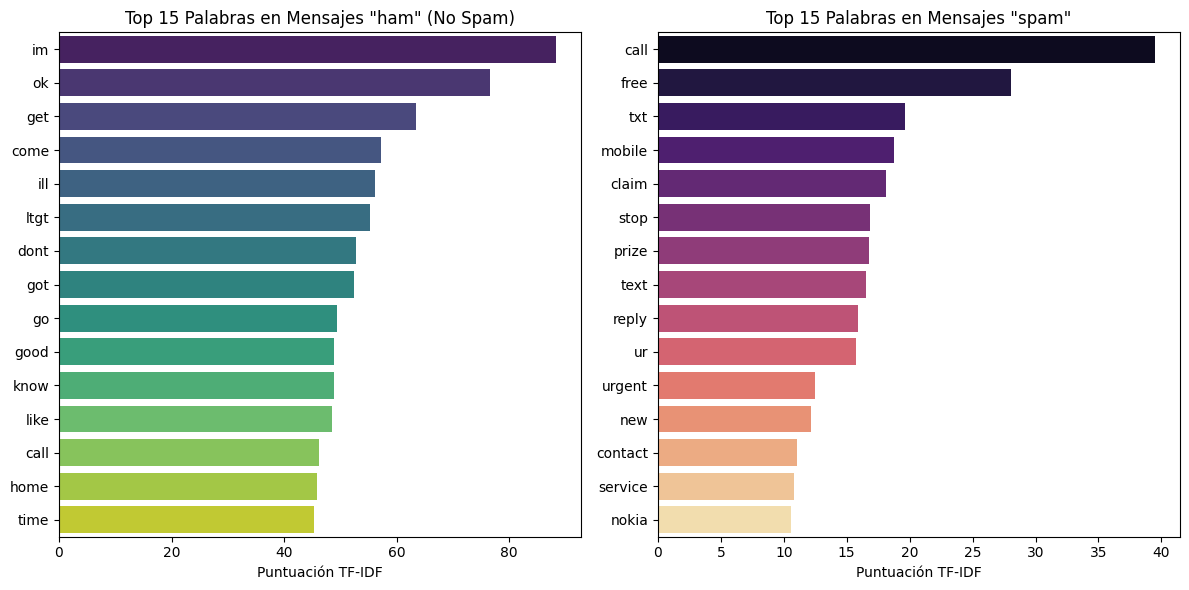

In [45]:
# Obtener los top N features para cada categoría
def get_top_n_features(vectorizer, data, categories, category_label, n=15):
    """
    Obtiene las n palabras con mayor peso (TF-IDF) para una categoría específica.
    """
    # Filtrar las filas de la categoría de interés
    category_indices = [i for i, label in enumerate(categories) if label == category_label]
    category_data = data[category_indices, :]

    # Calcular la suma de los pesos TF-IDF por palabra
    word_sums = np.array(category_data.sum(axis=0)).flatten()

    # Obtener los nombres de las palabras
    feature_names = vectorizer.get_feature_names_out()

    # Crear un DataFrame con las palabras y sus pesos
    word_scores = pd.DataFrame({'palabra': feature_names, 'puntaje': word_sums})
    word_scores = word_scores.sort_values(by='puntaje', ascending=False)

    return word_scores.head(n)

# Obtener las palabras más importantes para la categoría 'ham'
top_ham_words = get_top_n_features(tfidf_vectorizer, X_tfidf, df['Category'], 'ham')

# Obtener las palabras más importantes para la categoría 'spam'
top_spam_words = get_top_n_features(tfidf_vectorizer, X_tfidf, df['Category'], 'spam')

# Visualizar las palabras más importantes para cada categoría
plt.figure(figsize=(12, 6))

# Gráfico para "ham"
plt.subplot(1, 2, 1)
sns.barplot(x='puntaje', y='palabra', data=top_ham_words, palette='viridis', hue='palabra', legend=False)
plt.title('Top 15 Palabras en Mensajes "ham" (No Spam)')
plt.xlabel('Puntuación TF-IDF')
plt.ylabel('')

# Gráfico para "spam"
plt.subplot(1, 2, 2)
sns.barplot(x='puntaje', y='palabra', data=top_spam_words, palette='magma', hue='palabra', legend=False)
plt.title('Top 15 Palabras en Mensajes "spam"')
plt.xlabel('Puntuación TF-IDF')
plt.ylabel('')

plt.tight_layout()
plt.show()



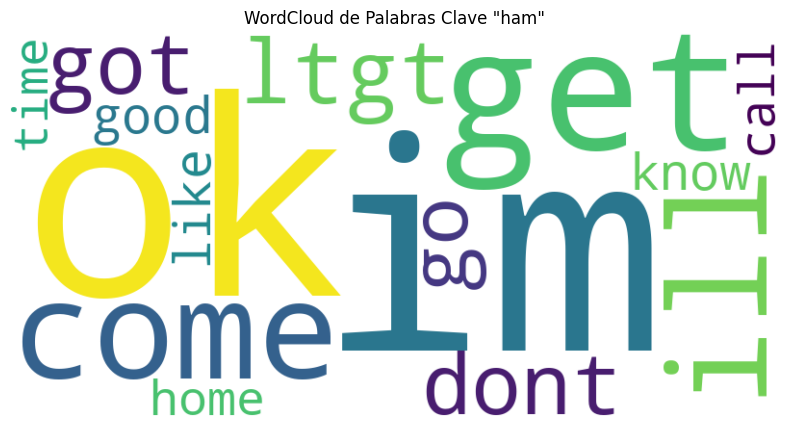

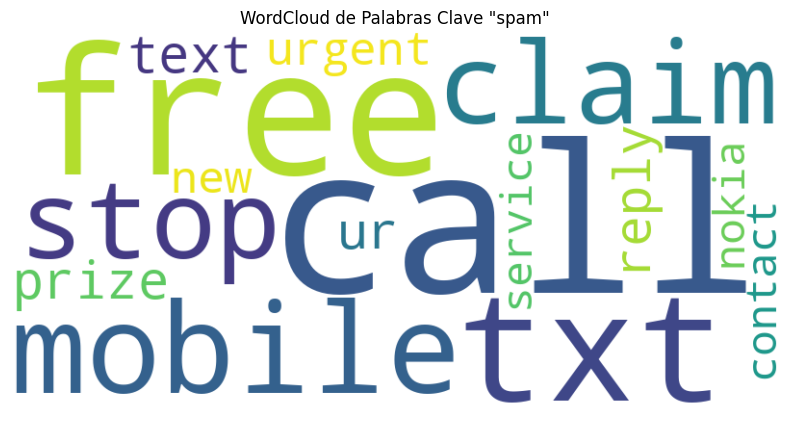

In [46]:
# Para una mayo visualizacion se genero una nube de palabras
def generate_wordcloud_from_df(dataframe, title):
    """
    Genera una WordCloud a partir de un DataFrame de palabras y sus puntuaciones.
    """
    word_dict = dict(zip(dataframe['palabra'], dataframe['puntaje']))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_dict)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_wordcloud_from_df(top_ham_words, 'WordCloud de Palabras Clave "ham"')
generate_wordcloud_from_df(top_spam_words, 'WordCloud de Palabras Clave "spam"')

# LSTM

In [47]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

# Datos de entrada
X_text = df['Email Text_clean']
y = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

# 1. Tokenización y Vectorización
max_words = 10000  # Número de palabras a considerar
tokenizer = Tokenizer(num_words=max_words, oov_token='<unk>')
tokenizer.fit_on_texts(X_text)
X_sequences = tokenizer.texts_to_sequences(X_text)

# 2. Relleno de Secuencias
max_len = 50  # Longitud máxima de las secuencias
X_padded = pad_sequences(X_sequences, maxlen=max_len, padding='post', truncating='post')

# 3. División de datos
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

print(f"Forma de los datos de entrenamiento: {X_train.shape}")
print(f"Forma de los datos de prueba: {X_test.shape}")

Forma de los datos de entrenamiento: (4135, 50)
Forma de los datos de prueba: (1034, 50)


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Parámetros del modelo
embedding_dim = 128  # Dimensión de la capa de embedding
lstm_units = 64      # Unidades en la capa LSTM

# Construcción del modelo
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(units=lstm_units, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compilación del modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Entrenamiento del modelo
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 15s 90ms/step - accuracy: 0.8320 - loss: 0.4431 - val_accuracy: 0.9130 - val_loss: 0.2991
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.8750 - loss: 0.3784 - val_accuracy: 0.9130 - val_loss: 0.3166
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.8786 - loss: 0.3726 - val_accuracy: 0.9517 - val_loss: 0.1774
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9587 - loss: 0.1597 - val_accuracy: 0.9444 - val_loss: 0.1802
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.9614 - loss: 0.1470 - val_accuracy: 0.9469 - val_loss: 0.1759
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.9698 - loss: 0.1193 - val_accuracy: 0.9420 - val_loss: 0.1958
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.9660 - loss: 0.1244 - val_accuracy: 0.9372 - val_loss: 0.2032
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.9695 - loss: 0.1159 - va

In [49]:
# Evaluar el modelo con los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión del modelo en los datos de prueba: {accuracy*100:.2f}%")

# Realizar predicciones y mostrar un informe de clasificación
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype("int32")

from sklearn.metrics import classification_report
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

Precisión del modelo en los datos de prueba: 96.52%
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step

Reporte de Clasificación:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       889
        spam       0.99      0.76      0.86       145

    accuracy                           0.97      1034
   macro avg       0.98      0.88      0.92      1034
weighted avg       0.97      0.97      0.96      1034



# CONCLUSIONES

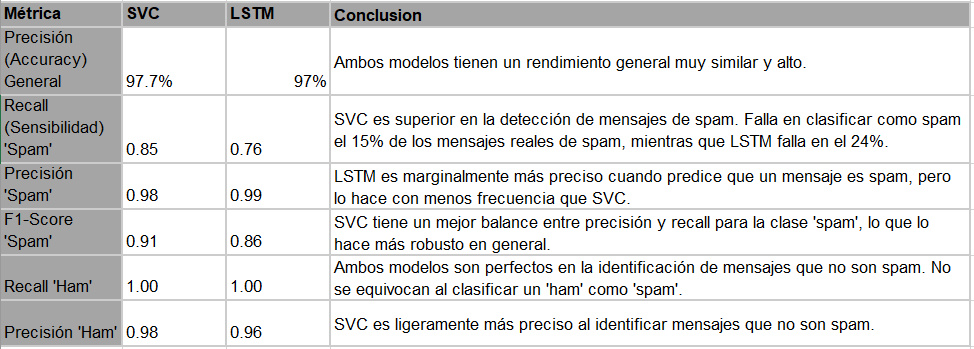

## **Conclusión General**

Ambos modelos tienen un alta precisión general, el modelo SVC es el que mejor performance tiene en la  tarea de clasificación. Su superioridad sen nota en la métrica más crítica para la detección de spam: el recall de la clase "spam". Un alto recall para "spam"  minimiza el número de mensajes de spam que llegan a la bandeja de entrada.

El modelo LSTM, a pesar de su precisión casi perfecta para "spam" (0.99), es menos efectivo en la práctica porque falla en identificar un porcentaje significativo de mensajes spam reales. Por lo tanto, el SVC ofrece un mejor equilibrio para esta tarea, proporcionando un rendimiento más robusto y confiable.

# **Mejoras**

* La principal área de mejora sería aumentar la tasa de recall para la clase spam, a fin de que los modelo pueda detectar una mayor proporción de correos basura que actualmente está pasando por alto.

* Mejoras en los Modelos, Ajuste de Hiperparámetros (Tuning)
